In [1]:
pip install opendatasets --upgrade

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paravgupta7
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:01<00:00, 372MB/s]


In [3]:
filename="/content/us-accidents/US_Accidents_March23.csv"

## **DATA CLEANING AND PREPARATION**

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv(filename,chunksize=10000)
sampled_df = pd.concat([chunk.sample(frac=0.1) for chunk in df])
sampled_df.to_csv(filename, index=False)

In [5]:
sampled_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
sampled_df.shape

(772839, 46)

In [7]:
sampled_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7341,A-7342,Source2,2,2016-12-15 21:14:54,2016-12-15 21:44:45,38.373032,-121.358482,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
5185,A-5186,Source2,2,2016-12-01 12:16:15,2016-12-01 12:45:54,38.698463,-121.461494,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9239,A-9240,Source2,2,2017-01-02 15:36:02,2017-01-02 16:05:45,38.474319,-121.454613,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
839,A-840,Source2,3,2016-06-22 08:01:02,2016-06-22 08:46:36,37.574360,-121.885239,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7797,A-7798,Source2,2,2016-12-19 22:22:23,2016-12-19 22:51:50,37.027870,-121.987411,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night


In [8]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772839 entries, 7341 to 7720936
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432561 non-null  float64
 8   End_Lng                432561 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772837 non-null  object 
 11  Street                 771740 non-null  object 
 12  City                   772813 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nul

In [9]:
sampled_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,772839.000000,772839.000000,772839.000000,432561.000000,432561.000000,772839.000000,756559.00000,572960.000000,755513.000000,758850.000000,755160.000000,715692.000000,552815.000000
mean,2.211206,36.201649,-94.709028,36.256482,-95.734660,0.560235,61.66390,58.257995,64.849894,29.538862,9.088419,7.681197,0.008385
std,0.486319,5.076196,17.386149,5.272761,18.098881,1.760293,19.04293,22.427555,22.814236,1.007371,2.683806,5.495614,0.107040
min,1.000000,24.560688,-124.535893,24.570107,-124.539056,0.000000,-89.00000,-89.000000,1.000000,0.300000,0.000000,0.000000,0.000000
25%,2.000000,33.396890,-117.219748,33.461630,-117.746672,0.000000,49.00000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.823887,-87.804436,36.181327,-88.029964,0.030000,64.00000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.083400,-80.355898,40.161756,-80.249882,0.463000,76.00000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.998445,-67.606864,49.002025,-67.626576,242.339996,140.00000,140.000000,100.000000,58.630000,111.000000,1087.000000,10.050000


In [10]:
sampled_df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,340278
End_Lng,340278
Distance(mi),0


In [11]:
missing_values=sampled_df.isna().sum().sort_values(ascending=False)/len(sampled_df)*100
missing_values

,0
End_Lng,44.029610
End_Lat,44.029610
Precipitation(in),28.469578
Wind_Chill(F),25.862955
Wind_Speed(mph),7.394425
Visibility(mi),2.287540
Wind_Direction,2.250663
Humidity(%),2.241864
Weather_Condition,2.238629
Temperature(F),2.106519


In [12]:
missing_values=missing_values[missing_values!=0]

<Axes: xlabel='Percentage of Missing Values', ylabel='Features'>

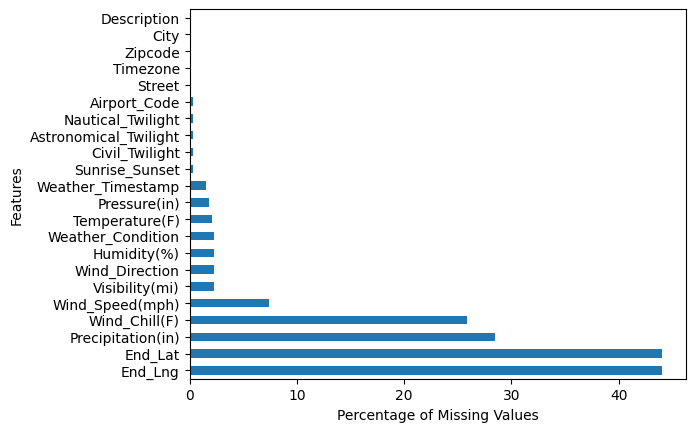

In [13]:
missing_values.plot(kind='barh', xlabel='Percentage of Missing Values', ylabel='Features')

In [ ]:
sampled_df=sampled_df.drop(['End_Lat', 'End_Lng'],axis=1)

In [16]:
sampled_df=sampled_df.drop(['Wind_Chill(F)'],axis=1)

In [17]:
sampled_df.shape

(772839, 43)

## **EXPLORATORY ANALYSIS AND VISUALIZATION**
*   CITY
*   START TIME
*   LAT,LONG
*   TEMP


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sampled_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

***CITIES***

In [20]:
cities_name=sampled_df.City.unique()
print(len(cities_name))
cities_accidents=sampled_df.City.value_counts()
print(cities_accidents)

10307
City
Miami               18596
Houston             17064
Los Angeles         15688
Charlotte           13871
Dallas              13102
                    ...  
Adena                   1
Burnet                  1
Owen                    1
Rural Valley            1
South Sioux City        1
Name: count, Length: 10306, dtype: int64


In [21]:
print(cities_accidents['New York'])

2115


<Axes: ylabel='City'>

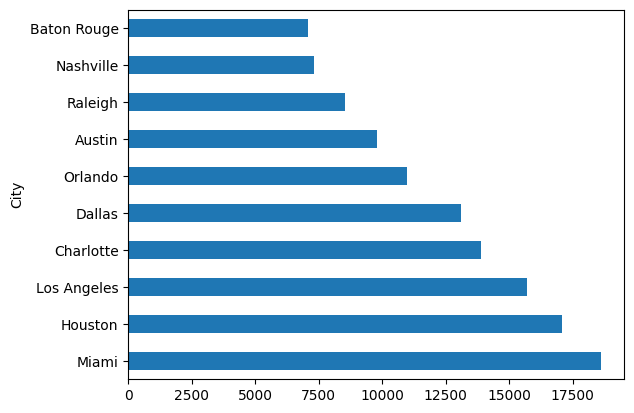

In [22]:
cities_accidents[:10].plot(kind='barh')

<Axes: xlabel='count', ylabel='Count'>

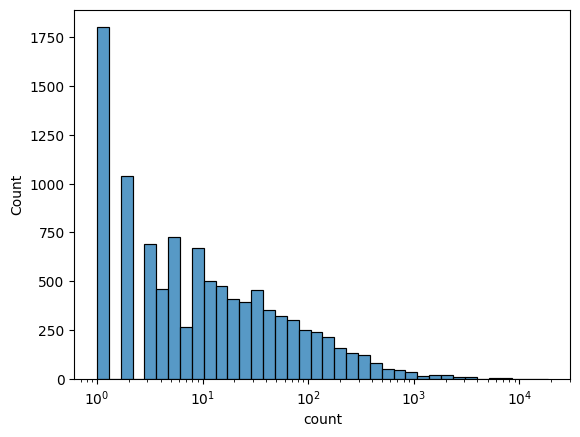

In [23]:
sns.histplot(cities_accidents,log_scale=True)

In [24]:
high_accident_cities=cities_accidents[cities_accidents>=1000]
print(len(high_accident_cities))
low_accident_cities=cities_accidents[cities_accidents<1000]
print(len(low_accident_cities))

104
10202


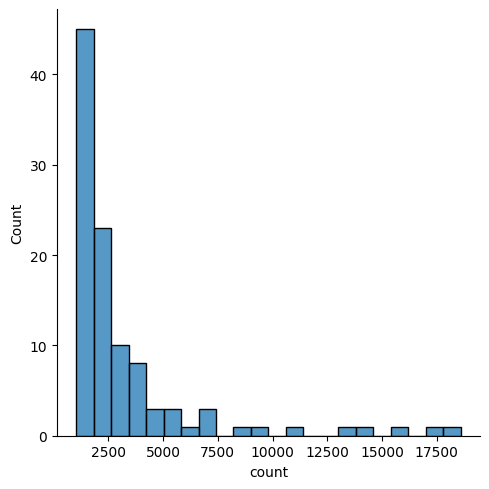

In [25]:
sns.displot(high_accident_cities)

***TIME***

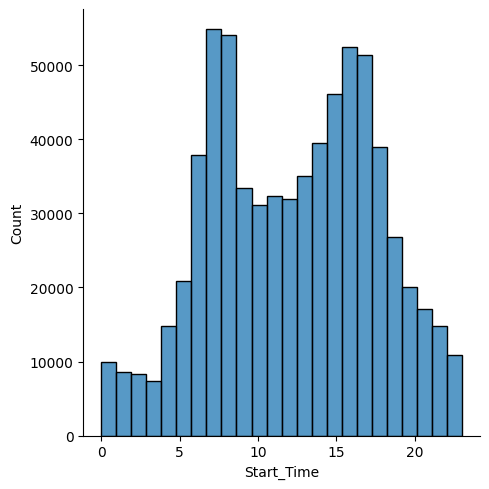

In [26]:
sampled_df.Start_Time = pd.to_datetime(sampled_df.Start_Time, errors='coerce')
sns.displot(sampled_df.Start_Time.dt.hour, bins=24, kde=False)

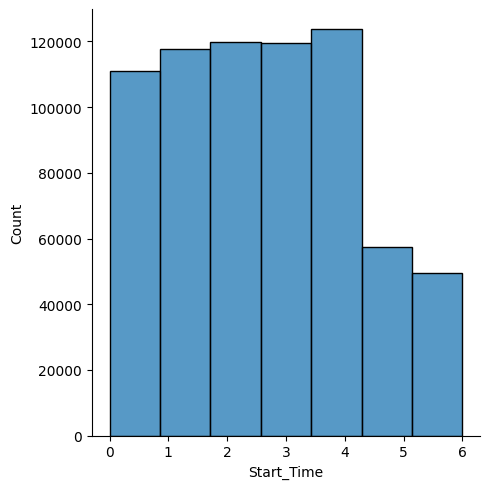

In [27]:
sns.displot(sampled_df.Start_Time.dt.dayofweek, bins=7, kde=False)

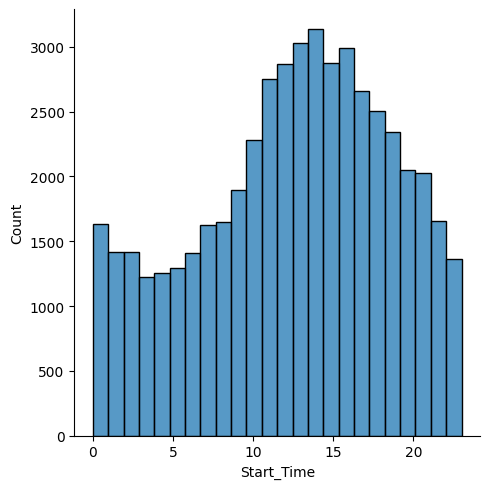

In [28]:
sundays_start_time = sampled_df.Start_Time[sampled_df.Start_Time.dt.dayofweek == 6]
sns.displot(sundays_start_time.dt.hour, bins=24, kde=False)

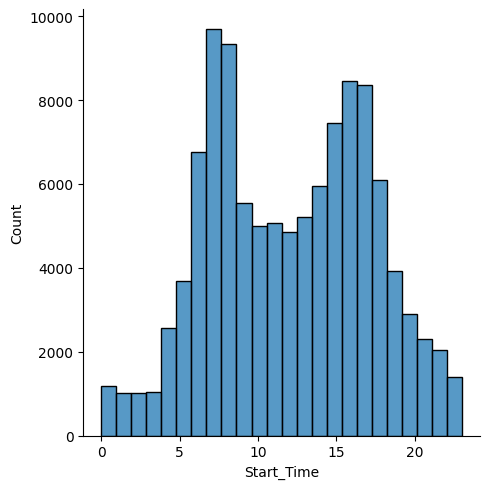

In [29]:
monday_start_time = sampled_df.Start_Time[sampled_df.Start_Time.dt.dayofweek == 0]
sns.displot(monday_start_time.dt.hour, bins=24, kde=False)

<Axes: ylabel='count'>

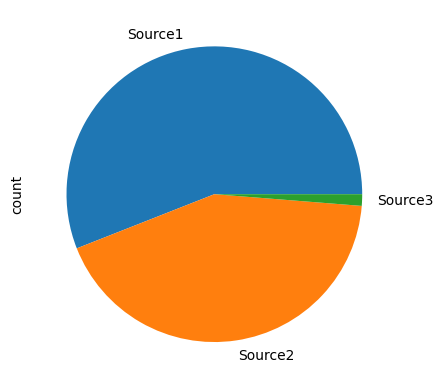

In [30]:
sampled_df.Source.value_counts().plot(kind='pie')

***LATITUES AND LONGITUDES***

In [31]:
sampled_df.Start_Lat

,Start_Lat
7341,38.373032
5185,38.698463
9239,38.474319
839,37.574360
7797,37.027870
...,...
7720739,38.838320
7728191,41.209930
7727037,34.696746
7723290,26.602970


In [32]:
sampled_df.Start_Lng

,Start_Lng
7341,-121.358482
5185,-121.461494
9239,-121.454613
839,-121.885239
7797,-121.987411
...,...
7720739,-104.387160
7728191,-111.948470
7727037,-85.568897
7723290,-80.068830


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

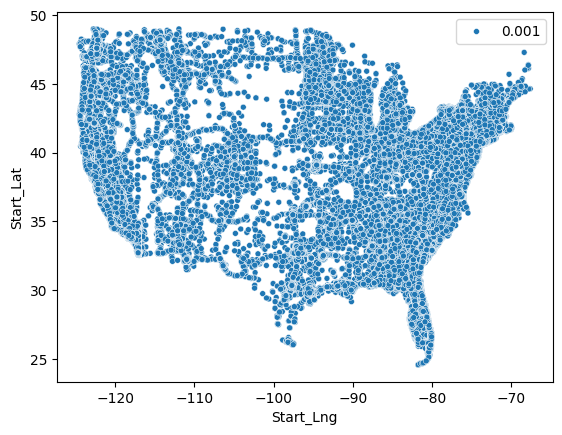

In [33]:
sns.scatterplot(x=sampled_df.Start_Lng, y=sampled_df.Start_Lat, size=0.001)

***TEMPERATURE***

In [34]:
sampled_df['Temperature(F)'].describe()

,Temperature(F)
count,756559.00000
mean,61.66390
std,19.04293
min,-89.00000
25%,49.00000
50%,64.00000
75%,76.00000
max,140.00000


In [35]:
sampled_df['Temperature(C)']=((sampled_df['Temperature(F)']-32)*(5/9))

In [36]:
sampled_df[['Temperature(C)', 'Temperature(F)']]

,Temperature(C),Temperature(F)
7341,13.277778,55.9
5185,12.000000,53.6
9239,8.888889,48.0
839,16.722222,62.1
7797,4.388889,39.9
...,...,...
7720739,24.444444,76.0
7728191,26.666667,80.0
7727037,26.666667,80.0
7723290,28.888889,84.0


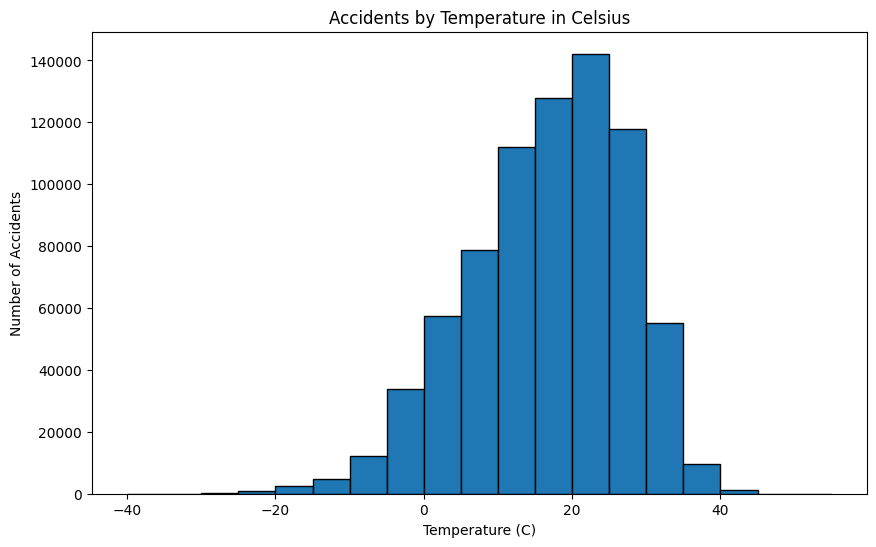

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['Temperature(C)'].dropna(), bins=range(-40, 60, 5), edgecolor='black')
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Temperature in Celsius')
plt.show()

***MONTH***

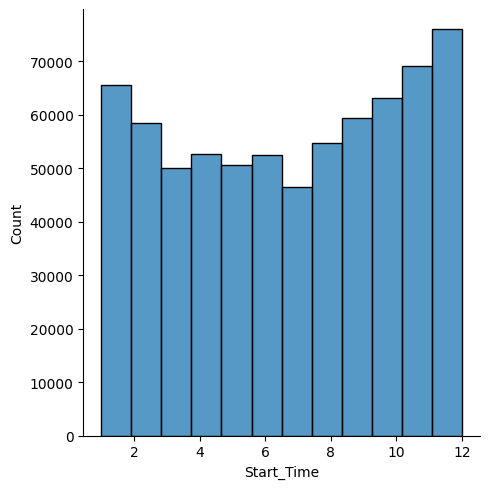

In [38]:
sns.displot(sampled_df.Start_Time.dt.month, bins=12, kde=False)
plt.xlabel='Month'

In [43]:
accidents_5_7 = sampled_df[sampled_df.Start_Time.dt.month.isin([5, 6, 7])]
num_accidents_5_7 = len(accidents_5_7)
print(f"Number of accidents between May to July: {num_accidents_5_7}")

accidents_11_1 = sampled_df[sampled_df.Start_Time.dt.month.isin([11, 12, 1])]
num_accidents_11_1 = len(accidents_11_1)
print(f"Number of accidents between November to January: {num_accidents_11_1}")

# Compare the number of accidents
if num_accidents_5_7 > num_accidents_11_1:
    print("There are more accidents in summers than winters.")
elif num_accidents_11_1 > num_accidents_5_7:
    print("There are more accidents in winters than summers.")
else:
    print("The number of accidents in summers and winters is the same.")
difference=abs(num_accidents_5_7-num_accidents_11_1)
print('Difference=', difference)

print("Difference in Percentage =", difference/max(num_accidents_5_7,num_accidents_11_1)*100)

Number of accidents between May to July: 149611
Number of accidents between November to January: 210648
There are more accidents in winters than summers.
Difference= 61037
Difference in Percentage = 28.975826972010175


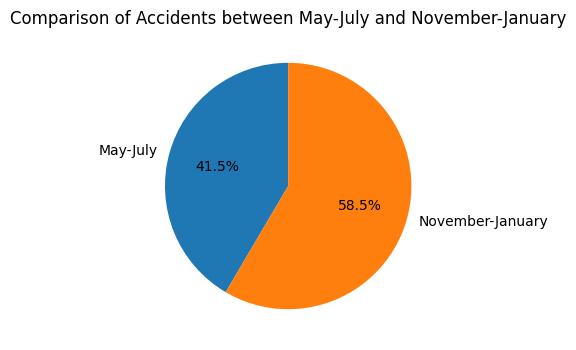

In [44]:
labels = ['May-July', 'November-January']
sizes = [num_accidents_5_7, num_accidents_11_1]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Accidents between May-July and November-January')
plt.show()

## **INFERENCES**



---


##**City-wise Analysis**

Big cities experience more accidents due to higher population density and vehicle volume.


---


##**Time-based Patterns**

*Peak accident times:*

Morning: 8 AM – 9 AM and Evening: 4 PM – 5 PM

*Weekday vs Weekend:*

Fewer accidents on Saturdays and Sundays.

Sunday Trend: Higher accident count between 11 AM – 6 PM (Recreational Activites).

Monday Trend: Spikes during 8 AM – 9 AM and 4 PM – 5 PM (Office hours lie in between these times).


---


## **Data Sources**

*Location (Latitude & Longitude)*

When plotted, reveals the USA map with dense accident activity along the coasts.

The central region appears sparsely populated in terms of accidents.


---


## **Temperature Data**

Accident-prone temperature range: '25°C – 35°C'.


Higher frequency of accidents in 'winter months', possibly due to slippery roads, reduced visibility, and harsh weather conditions.

# **SEVERITY PREDICTION USING RANDOM FOREST CLASSIFIER**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
dft = sampled_df.copy()

In [48]:
target = 'Severity'
features = [
    'Start_Lat', 'Start_Lng', 'Distance(mi)',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Weather_Condition','State', 'Timezone',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal',
    'Sunrise_Sunset', 'Civil_Twilight'
]

In [50]:
dft = dft[features + [target]]

dft.dropna(inplace=True)

cat_cols = dft.select_dtypes(include=['object', 'bool']).columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    dft[col] = le.fit_transform(dft[col])
    le_dict[col] = le

In [51]:
X = dft[features]
y = dft[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Prediction
y_pred = clf.predict(X_test)

In [63]:
single_row = X_test.iloc[[0]]
predicted_severity = clf.predict(single_row)

print(f"The predicted severity for the selected row is: {predicted_severity[0]}")
print(f"The actual severity for the selected row is: {y_test.loc[single_row.index[0]]}")

The predicted severity for the selected row is: 2
The actual severity for the selected row is: 2


In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy: 0.85436185053784

              precision    recall  f1-score   support

           1       0.65      0.06      0.11      1320
           2       0.87      0.96      0.92    113959
           3       0.71      0.48      0.57     22344
           4       0.51      0.06      0.11      3590

    accuracy                           0.85    141213
   macro avg       0.69      0.39      0.43    141213
weighted avg       0.84      0.85      0.83    141213



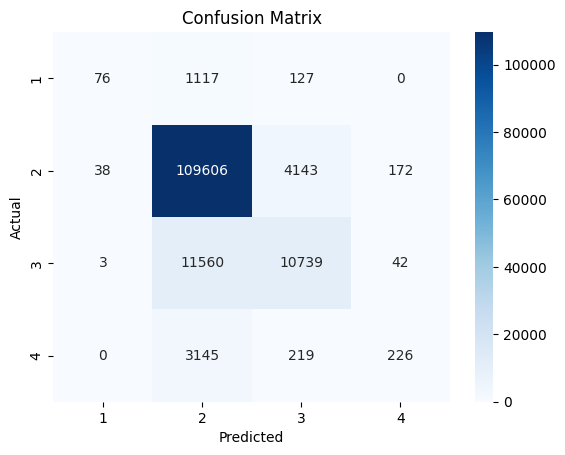

In [56]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

END